# 第2.1章 迭代法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

## 直接迭代法

In [2]:
N = 12

def direct_iterations(φ, x0, N):
    x_list = np.zeros(N)
    x_list[0] = x0
    for j in range(1,N):
        x_list[j] = φ(x_list[j-1])
    return x_list

### 例子1：$\varphi(x) = x^2$ 

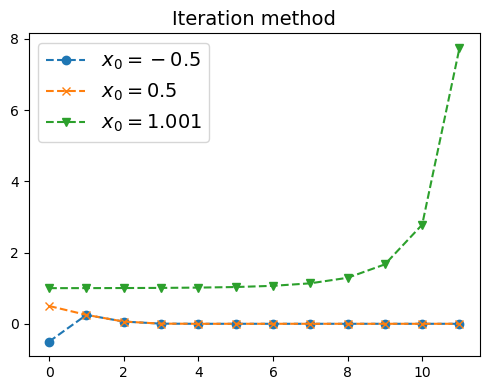

In [3]:
φ = lambda x : x**2
plt.figure(figsize=(5,4))
plt.plot(direct_iterations(φ, -1/2, N),'o--', label=r"$x_0=-0.5$")
plt.plot(direct_iterations(φ, 1/2, N) ,'x--', label=r"$x_0=0.5$")
plt.plot(direct_iterations(φ, 1.001, N),'v--', label=r"$x_0=1.001$")
plt.title("Iteration method",fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

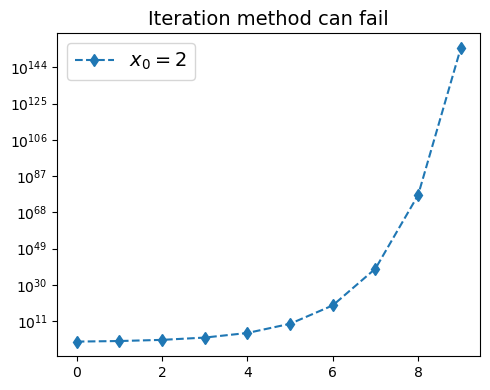

In [4]:
φ = lambda x : x**2
plt.figure(figsize=(5,4))
plt.plot(direct_iterations(φ, 2, 10),'d--', label=r"$x_0=2$")
plt.yscale("log")
plt.title("Iteration method can fail",fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

### 例子2：$\varphi(x) = c \sin(x)$

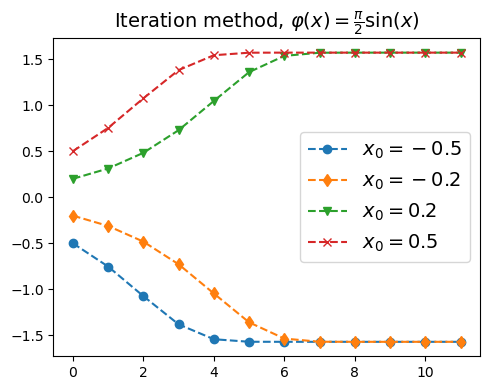

In [5]:
φ = lambda x : np.pi/2 * np.sin(x)
plt.figure(figsize=(5,4))
plt.plot(direct_iterations(φ, -1/2, N),'o--', label=r"$x_0=-0.5$")
plt.plot(direct_iterations(φ, -0.2, N),'d--', label=r"$x_0=-0.2$")
plt.plot(direct_iterations(φ, 0.2, N),'v--', label=r"$x_0=0.2$")
plt.plot(direct_iterations(φ, 1/2, N) ,'x--', label=r"$x_0=0.5$")
plt.title(r"Iteration method, $\varphi(x) = \frac{\pi}{2}\sin(x)$", fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

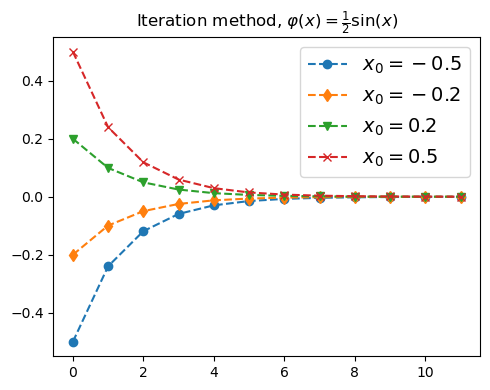

In [6]:
φ = lambda x : 1/2 * np.sin(x)
plt.figure(figsize=(5,4))
plt.plot(direct_iterations(φ, -0.5, N),'o--', label=r"$x_0=-0.5$")
plt.plot(direct_iterations(φ, -0.2, N),'d--', label=r"$x_0=-0.2$")
plt.plot(direct_iterations(φ, 0.2, N),'v--', label=r"$x_0=0.2$")
plt.plot(direct_iterations(φ, 0.5, N) ,'x--', label=r"$x_0=0.5$")
plt.legend(fontsize=14)
plt.title(r"Iteration method, $\varphi(x) = \frac{1}{2}\sin(x)$")
plt.tight_layout()
plt.show()

In [7]:
pd.DataFrame({"误差" : np.abs(direct_iterations(φ, 0.01, 10) - 0.0)})

误差
0  0.010000
1  0.005000
2  0.002500
3  0.001250
4  0.000625
5  0.000312
6  0.000156
7  0.000078
8  0.000039
9  0.000020

### 例子3：$\varphi(x) = |x|^{1/2}$

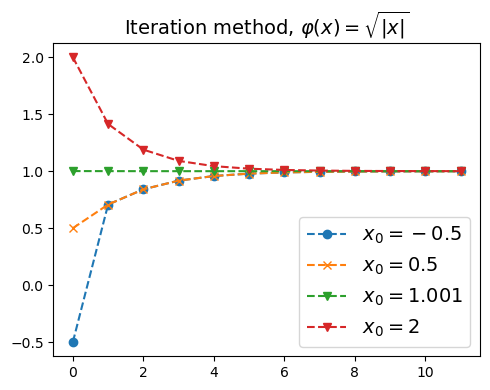

In [8]:
φ = lambda x : np.abs(x)**(1/2)

plt.figure(figsize=(5,4))
plt.plot(direct_iterations(φ, -1/2, N),'o--', label=r"$x_0=-0.5$")
plt.plot(direct_iterations(φ, 1/2, N) ,'x--', label=r"$x_0=0.5$")
plt.plot(direct_iterations(φ, 1.001, N),'v--', label=r"$x_0=1.001$")
plt.plot(direct_iterations(φ, 2, N),'v--', label=r"$x_0=2$")
plt.title(r"Iteration method, $\varphi(x) = \sqrt{|x|}$",fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

### 验证收敛速度

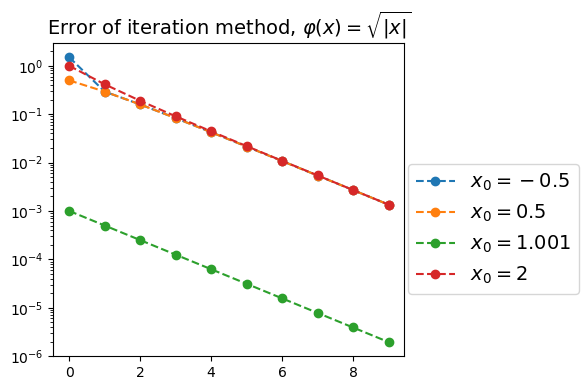

In [9]:
N = 10
x0_list = [-0.5, 0.5, 1.001, 2]
y_list = np.zeros((len(x0_list),N))
plt.figure(figsize=(6,4))
for j in range(len(x0_list)):
    y_list[j,:] =  direct_iterations(φ, x0_list[j], N)

plt.plot(np.abs(y_list[0,:]-1), 'o--',label=r"$x_0=-0.5$")
plt.plot(np.abs(y_list[1,:]-1), 'o--',label=r"$x_0=0.5$")
plt.plot(np.abs(y_list[2,:]-1), 'o--',label=r"$x_0=1.001$")
plt.plot(np.abs(y_list[3,:]-1), 'o--',label=r"$x_0=2$")
plt.yscale('log')
plt.title(r"Error of iteration method, $\varphi(x) = \sqrt{|x|}$",fontsize=14)
plt.legend(fontsize=14, loc=(1.01,0.2))
plt.tight_layout()

In [10]:
x = np.array(range(N))
slope0, _,r,_,se = linregress(x[-5:], np.log(np.abs(y_list[0,:]-1))[-5:])
slope1, _,_,_,_ = linregress(x[-5:], np.log(np.abs(y_list[1,:]-1))[-5:])
slope2, _,_,_,_ = linregress(x[-5:], np.log(np.abs(y_list[2,:]-1))[-5:])
slope3, _,_,_,_ = linregress(x[-5:], np.log(np.abs(y_list[3,:]-1))[-5:])
print("slope 0 =             {:.4f}".format(slope0))
print("slope 1 =             {:.4f}".format(slope1))
print("slope 2 =             {:.4f}".format(slope2))
print("slope 3 =             {:.4f}".format(slope3))
print("Prediction (theory) = {:.4f}".format(np.log(1/2)))

print()
print("R = {:4f}".format(r))

slope 0 =             -0.6907
slope 1 =             -0.6907
slope 2 =             -0.6932
slope 3 =             -0.6956
Prediction (theory) = -0.6931

R = -0.999999


## Aitken加速法

In [11]:
def aitken_iterations(φ, x0, N):
    x_list = np.zeros(N)
    x_list[0] = x0
    for j in range(1,N):
        x0_tmp = x_list[j-1]
        x1_tmp = φ(x0_tmp)
        x2_tmp = φ(x1_tmp)
        x_list[j] = x2_tmp - (x2_tmp-x1_tmp)**2/(x0_tmp + x2_tmp - 2*x1_tmp) 
    return x_list

### 例子1：对于$\varphi(x) = x^2$，简单的迭代法无法成功收敛到$x=1$，但是Aitken可以

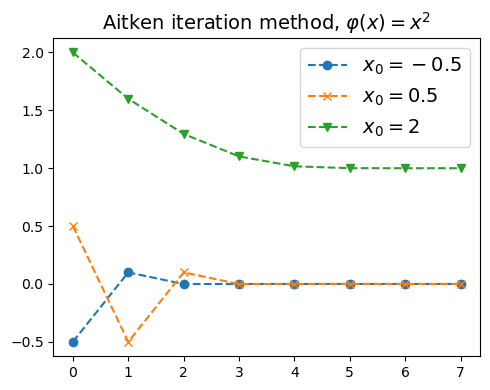

In [12]:
N = 8
φ = lambda x : x**2
plt.figure(figsize=(5,4))
plt.plot(aitken_iterations(φ, -1/2, N),'o--', label=r"$x_0=-0.5$")
plt.plot(aitken_iterations(φ, 1/2, N) ,'x--', label=r"$x_0=0.5$")
plt.plot(aitken_iterations(φ, 2, N),'v--', label=r"$x_0=2$")
plt.title(r"Aitken iteration method, $\varphi(x)=x^2$",fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

### 例子2：$\varphi(x) = |x|^{1/2}$，Aitken收敛速度比较快

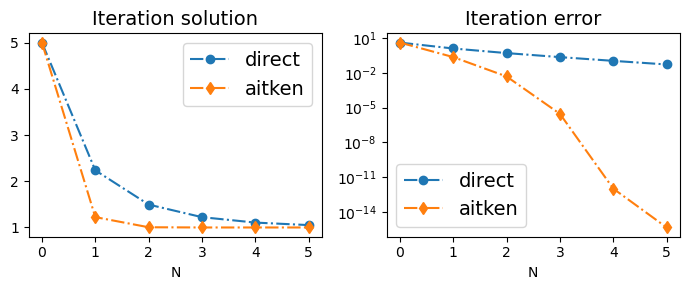

In [13]:
φ = lambda x : np.abs(x)**(1/2)
x0 = 5
N = 6
direct_iter_soln = direct_iterations(φ, x0, N)
aitken_iter_soln = aitken_iterations(φ, x0, N)

plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.plot(direct_iter_soln, 'o-.', label='direct')
plt.plot(aitken_iter_soln, 'd-.', label='aitken')
plt.legend(fontsize=14)
plt.xlabel("N")
plt.title("Iteration solution",fontsize=14)

plt.subplot(1,2,2)
plt.plot(range(N),np.abs(direct_iter_soln-1), 'o-.', label='direct')
plt.plot(range(N), np.abs(aitken_iter_soln-1), 'd-.', label='aitken')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel("N")
plt.title("Iteration error",fontsize=14)
plt.tight_layout()